In [25]:
import requests as rq
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from TCGA_files import *
#from ensembleAPI import geneinfo, genesinfo
from sklearn import metrics
from hsbmpy import *
import os

In [22]:
import importlib, hsbmpy
importlib.reload(hsbmpy)
from hsbmpy import *

## query many

In [27]:
level = 1
#setup='highlyvariable_colonrectal'
#setup = 'oversigma_10tissue'
#label = 'disease_type'
label='SMTS'
#labels = ['primary_site', 'disease_type', 'disease_tissue']
#labels=['RPPA','PAM50', 'disease_type','primary_diagnosis']
#labels = ['primary_site', 'secondary_site']
algorithm = 'topsbm'
#labels = ['primary_site', 'secondary_site', 'status']
#labels=['RPPA Clusters']
directory = "/home/fvalle/phd/datasets/gtex/log/3000_random-5000hvg"
L=get_max_available_L(directory, algorithm)
df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2,Cluster 3
0,GTEX-U412-0726-SM-EVR2Y,GTEX-ZEX8-0626-SM-DO118,GTEX-14XAO-2026-SM-69LOI
1,GTEX-1IY9M-0005-SM-CNNOU,GTEX-13S86-0326-SM-5SI6K,GTEX-XBED-1926-SM-47JYP
2,GTEX-1ICLZ-0011-R6b-SM-A9G3A,GTEX-15CHR-0626-SM-7938V,GTEX-1GN73-0226-SM-9WG67
3,GTEX-1IDJF-2126-SM-AHZ2S,GTEX-18A67-2126-SM-7LT9Y,GTEX-ZPCL-1126-SM-4WWFE
4,GTEX-1EH9U-0011-R5a-SM-CJI2K,GTEX-1H3NZ-1426-SM-9WYTA,GTEX-11EMC-2226-SM-5A5JW


In [42]:
df_files=pd.read_csv("https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t', index_col=0)
df_files.reindex(index=df_clusters.values.ravel()).to_csv("%s/files.dat"%directory, index=True, header=True)

In [36]:
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0]).dropna(axis=1, how='all').dropna()
#df_files.insert(2,'disease_tissue',["%s[%s]"%(df_files.at[s,'primary_site'],df_files.at[s,'disease_type']) for s in df_files.index])
labels=df_files.columns
#df_files.groupby(['primary_site','disease_type']).count()
labels

Index(['SMTS', 'SMTSD'], dtype='object')

In [37]:
labels = ['cases.0.diagnoses.0.prior_malignancy',
       'cases.0.diagnoses.0.tumor_grade', 'cases.0.project.primary_site',
       'cases.0.project.disease_type', 'cases.0.diagnoses.0.tumor_stage',
       'cases.0.diagnoses.0.progression_or_recurrence']
labels=['primary_site', 'disease_type']
labels=['SMTS']

True SMTS 3


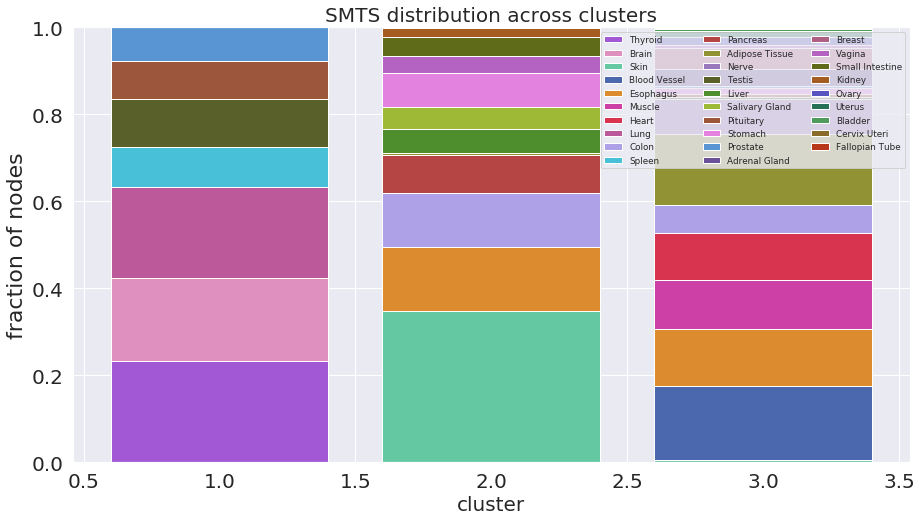

must shuffle files
True SMTS 2


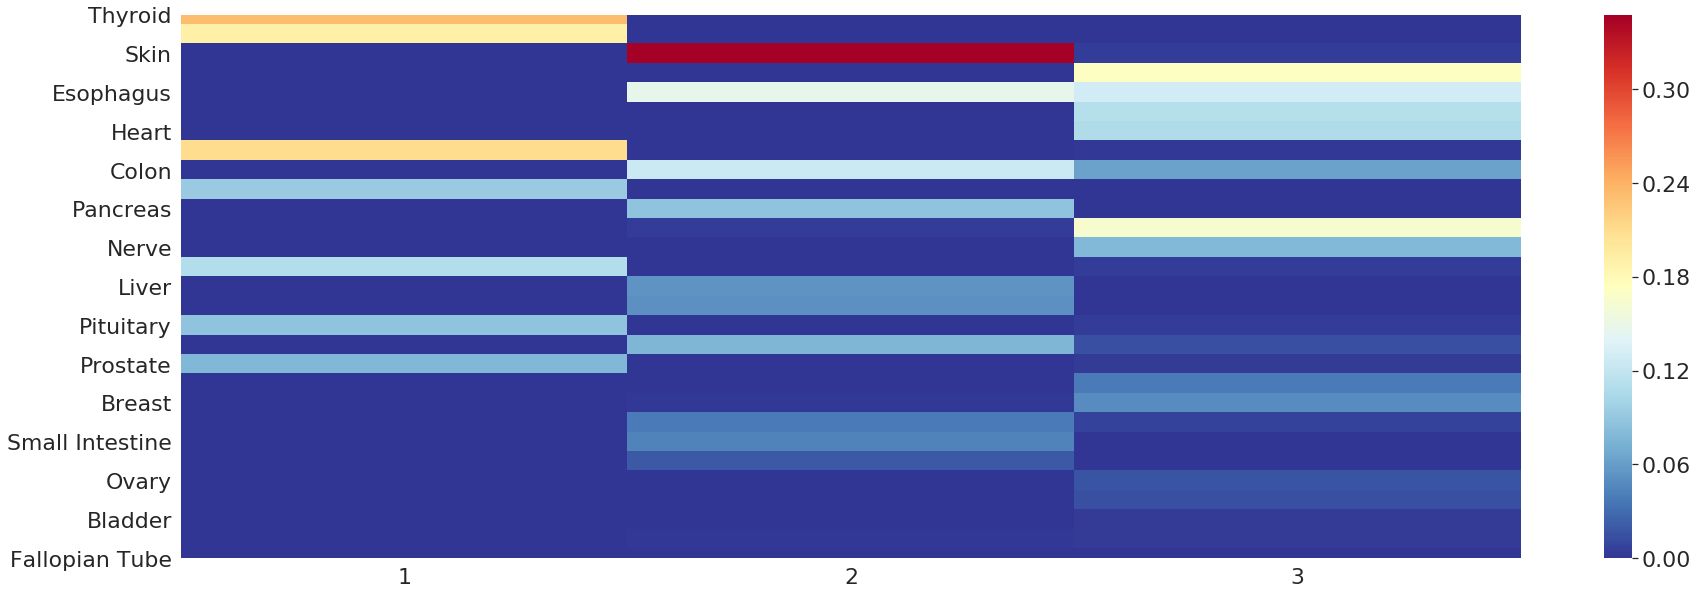

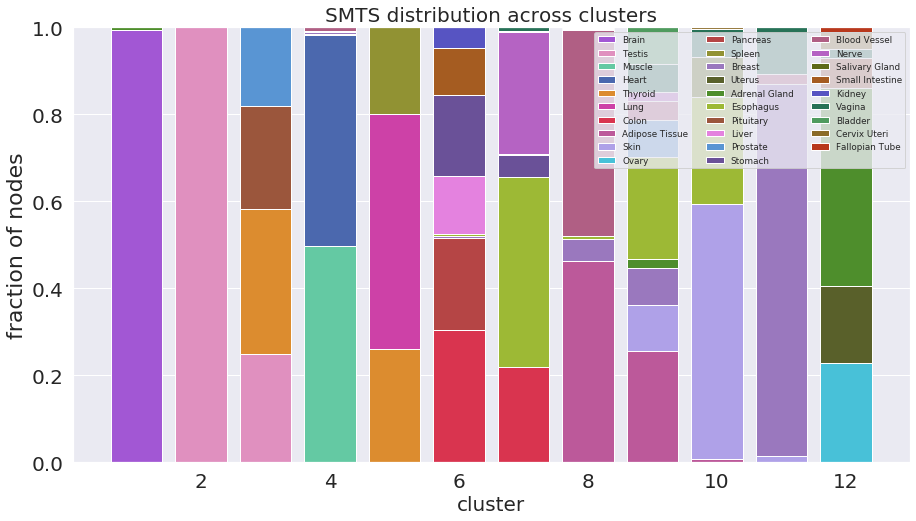

must shuffle files
True SMTS 1


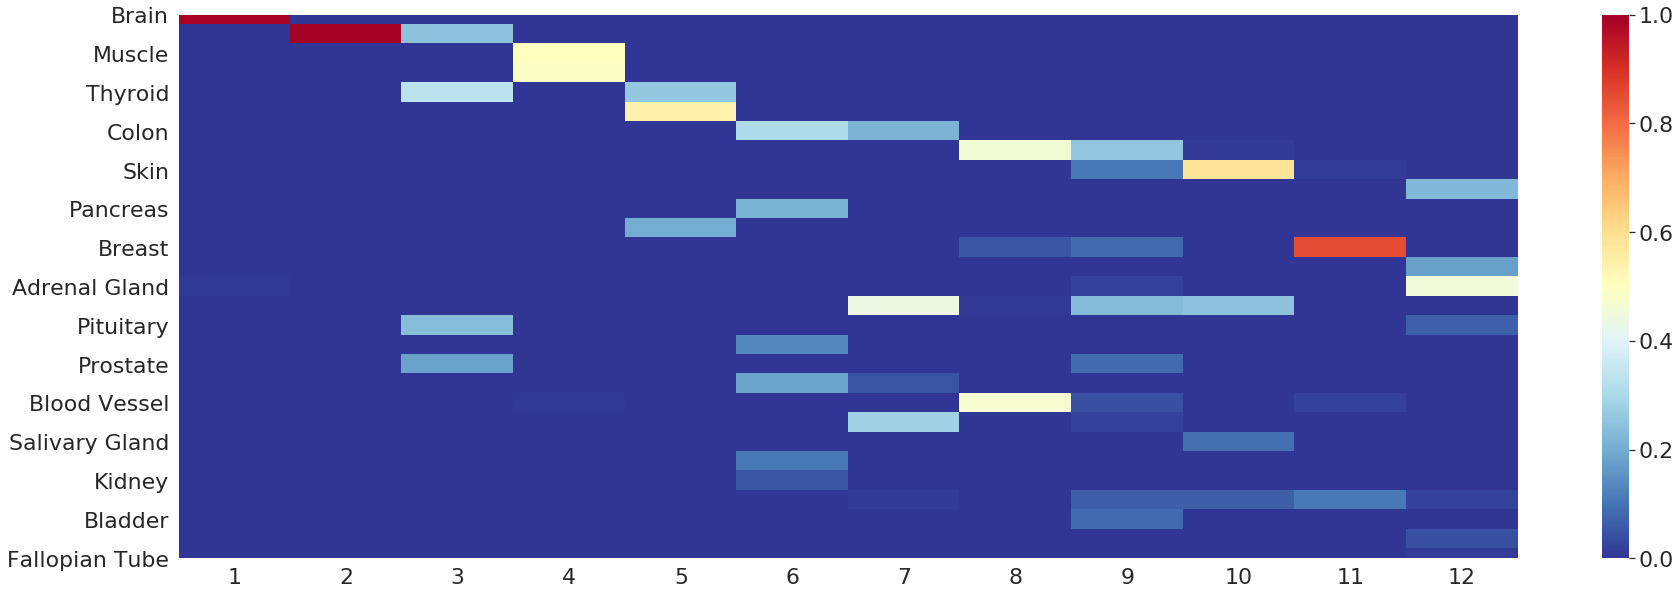

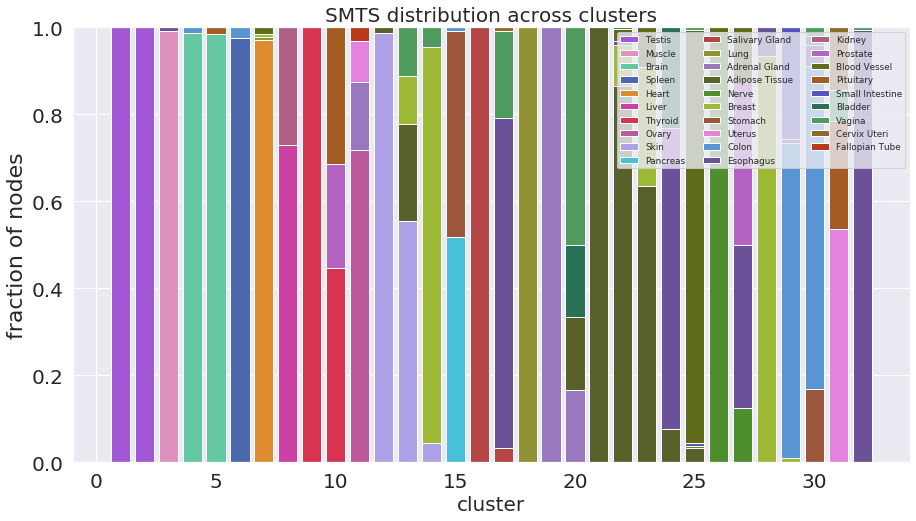

must shuffle files
True SMTS 0


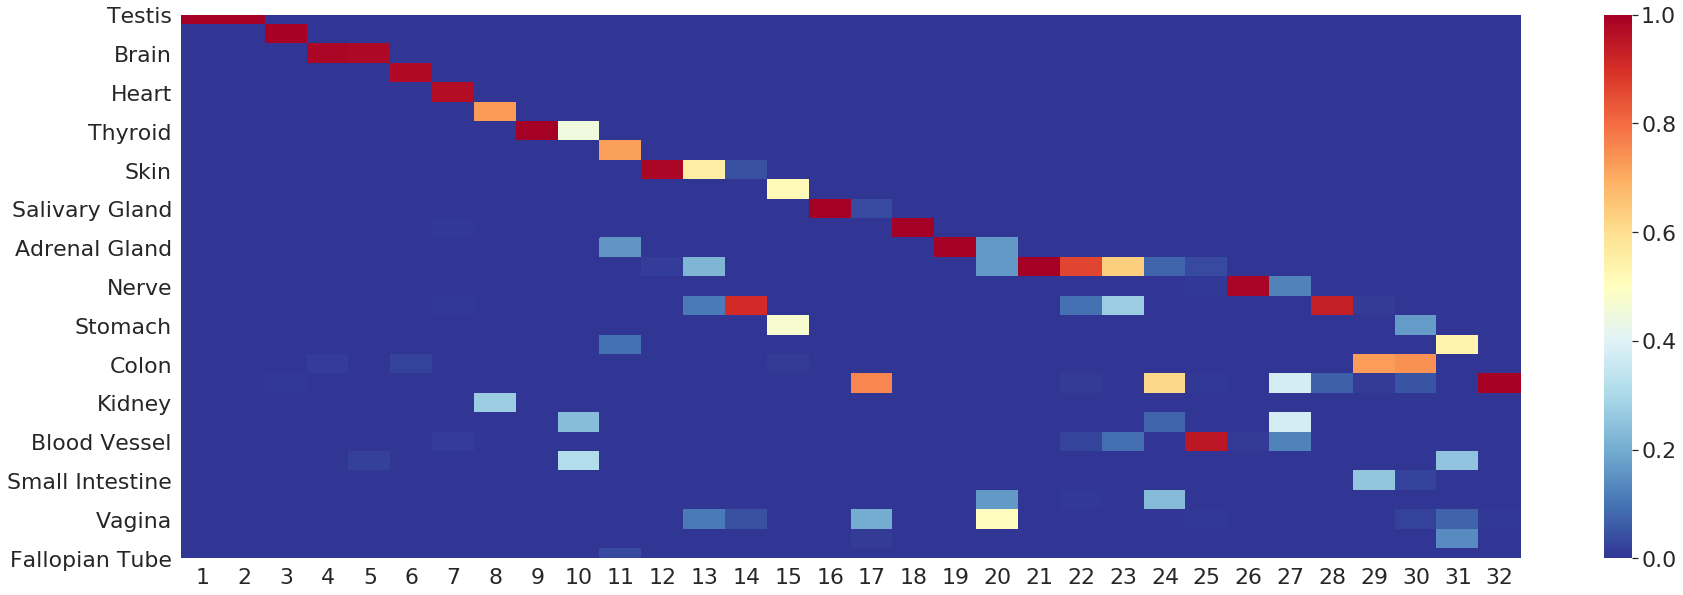

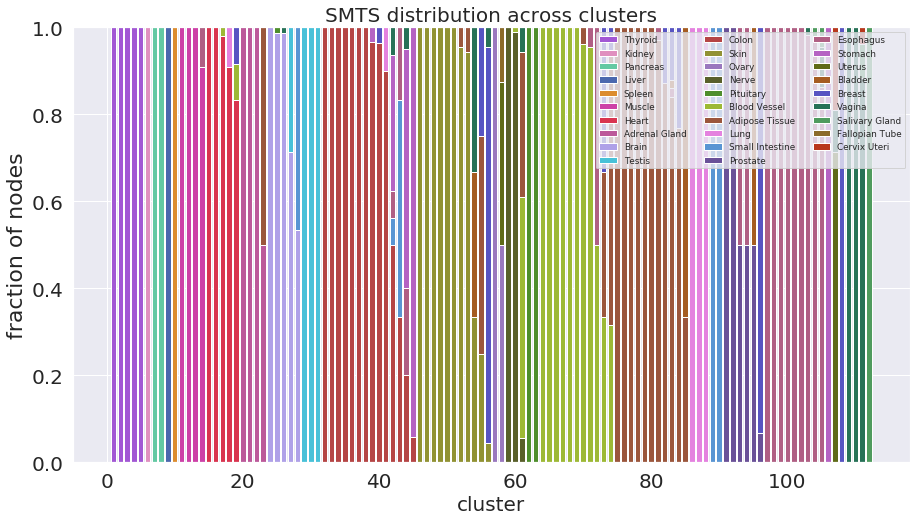

must shuffle files
False SMTS 3


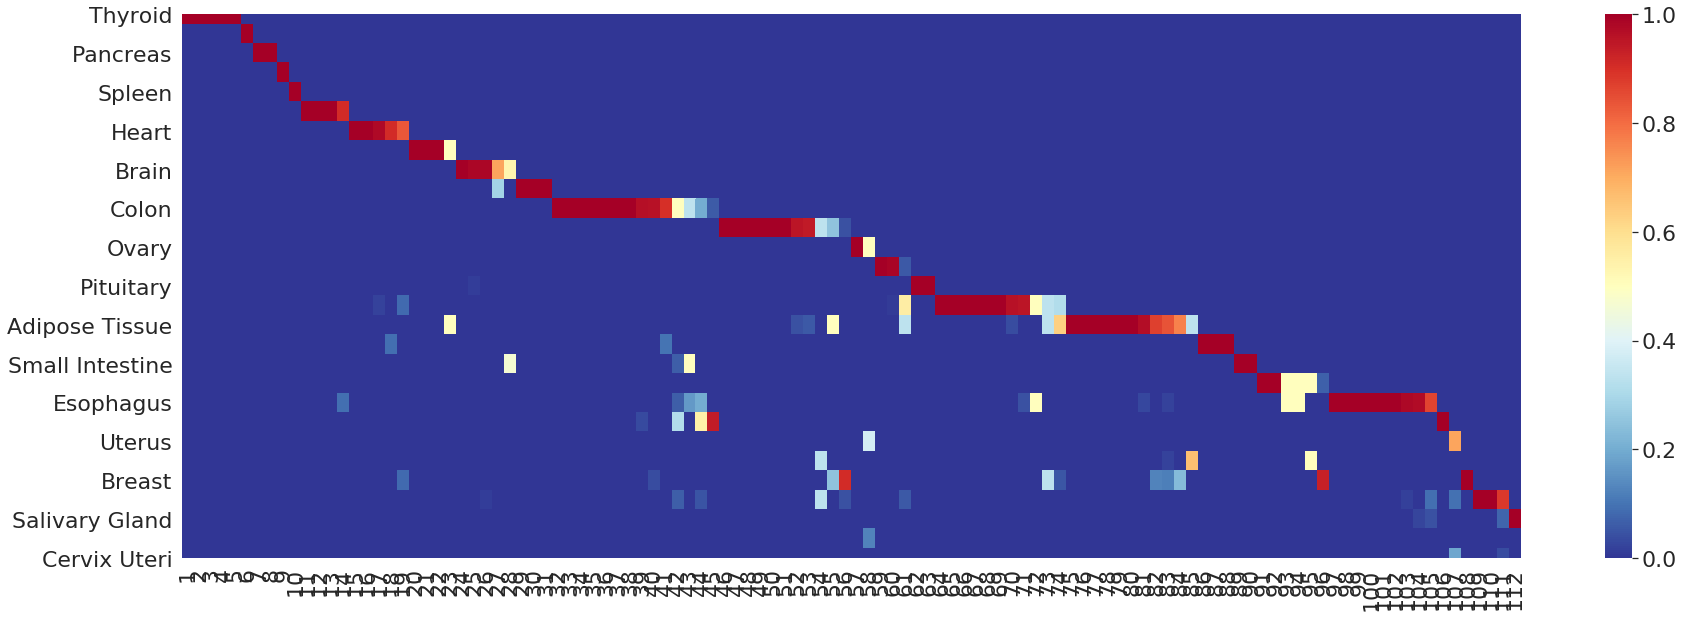

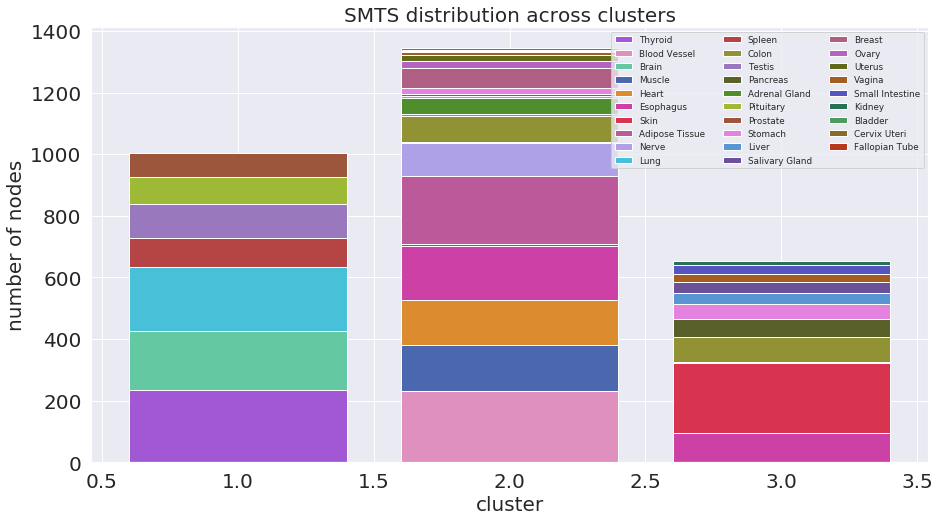

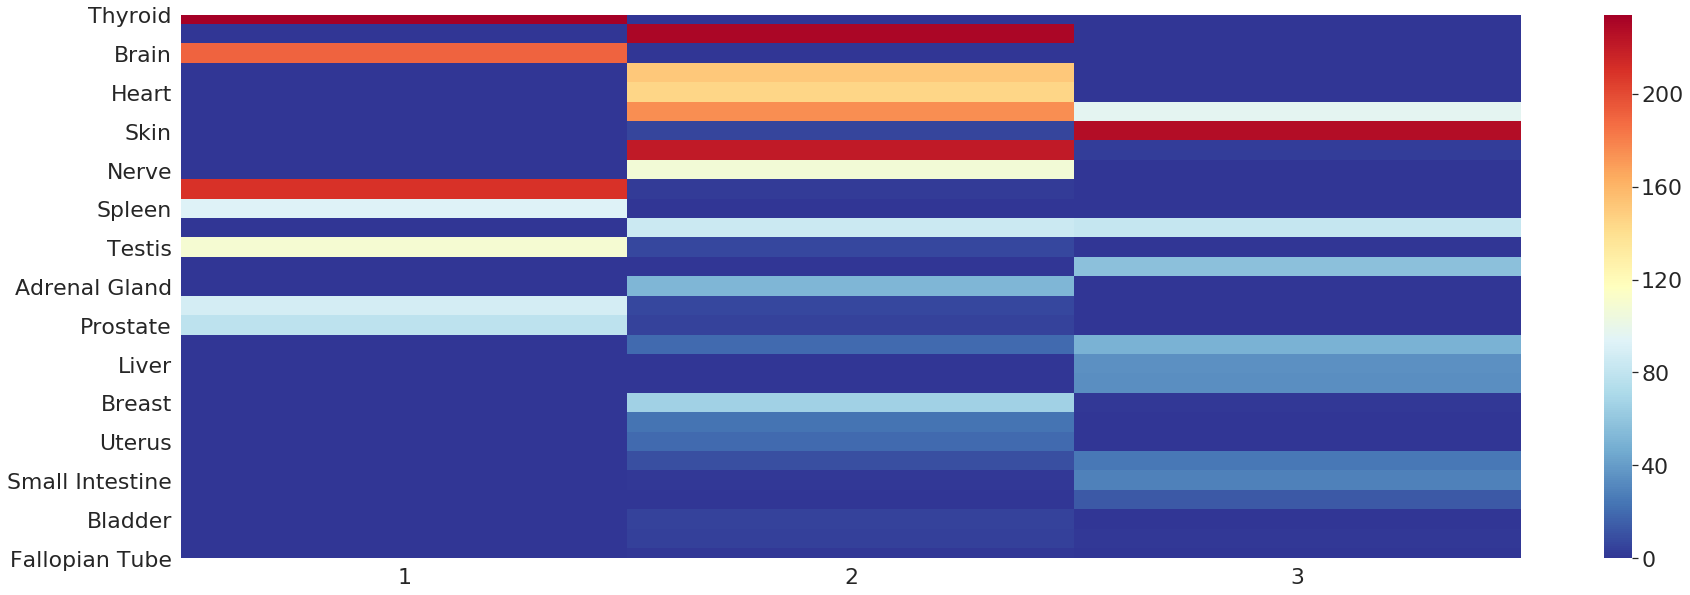

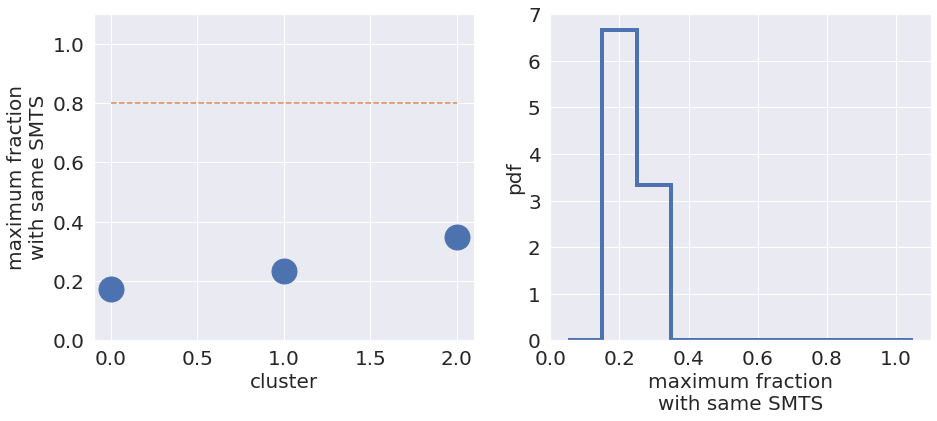

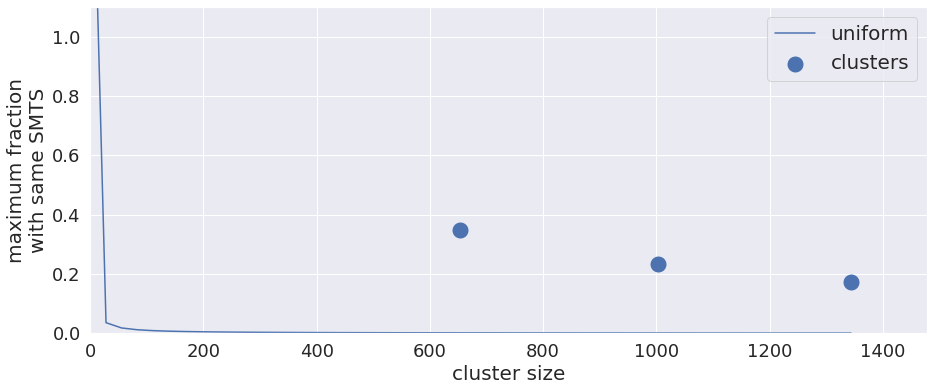

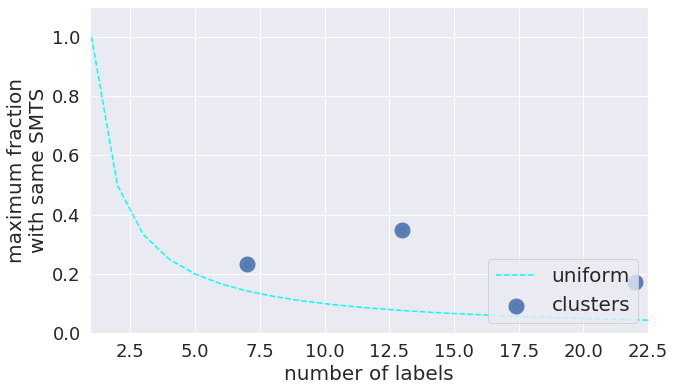

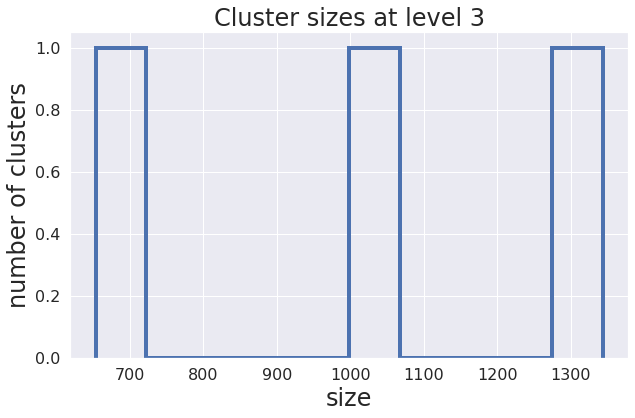

must shuffle files
False SMTS 2


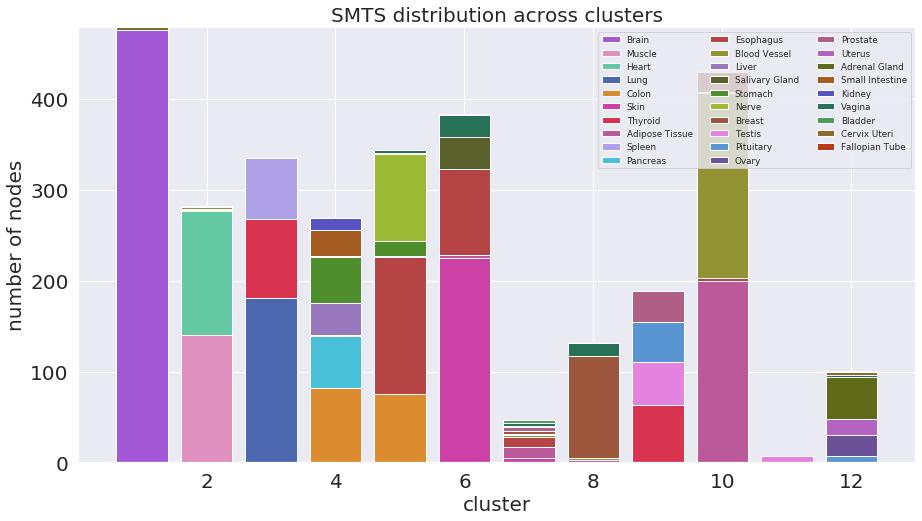

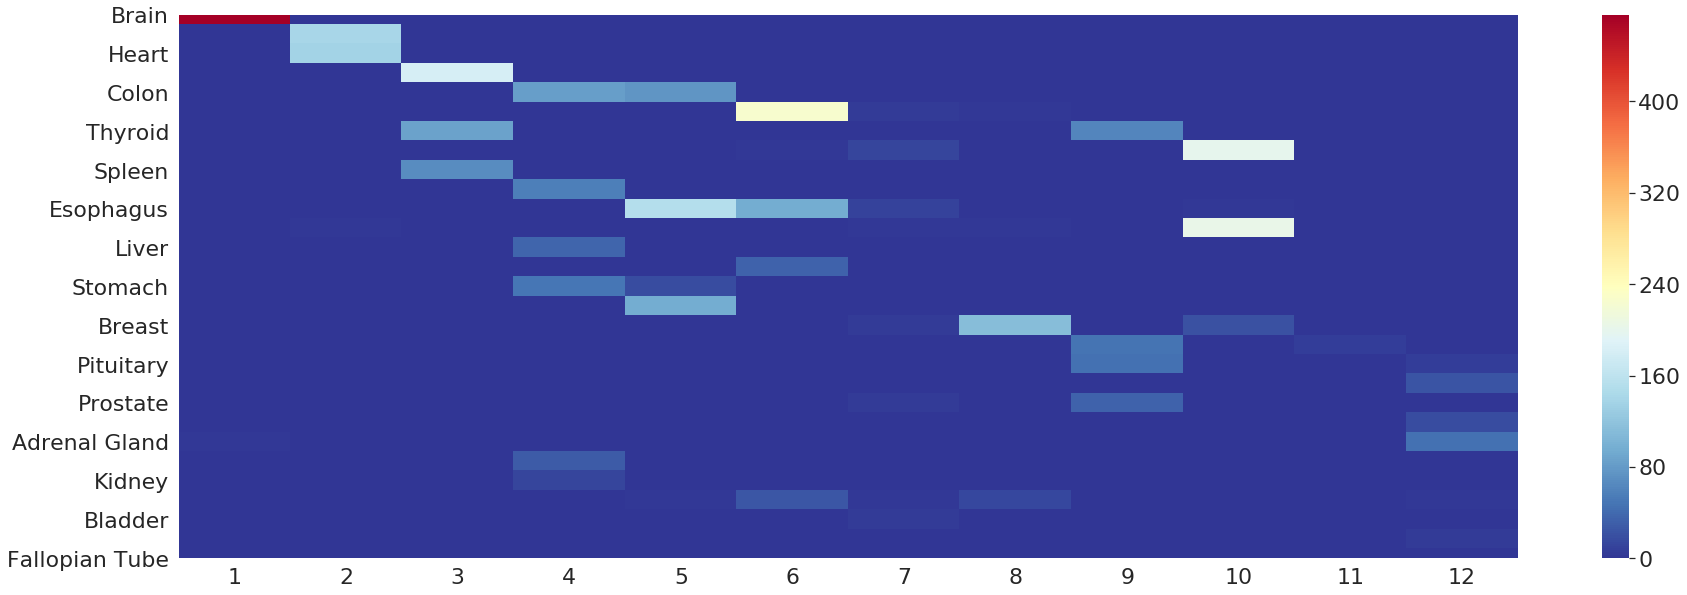

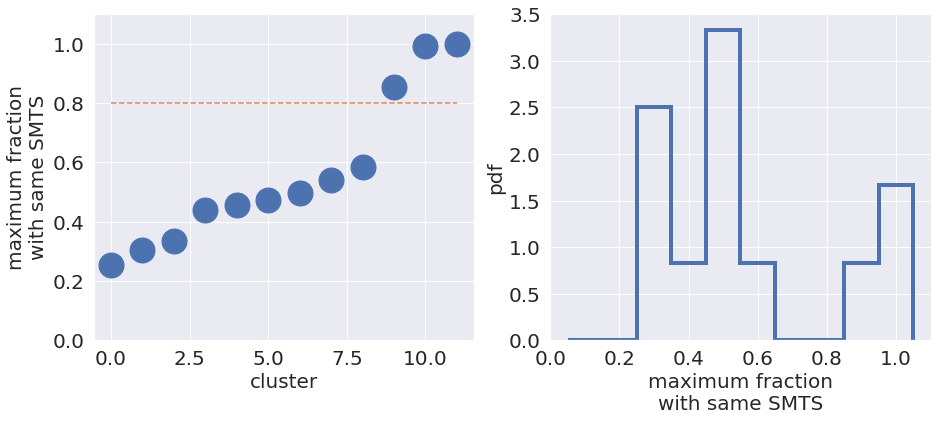

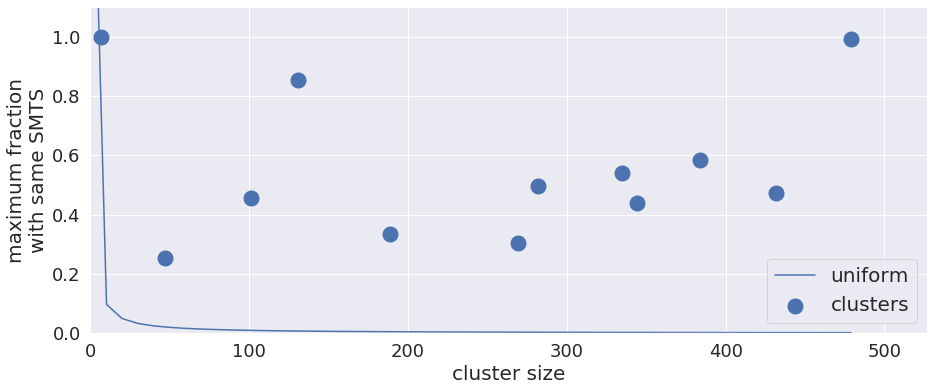

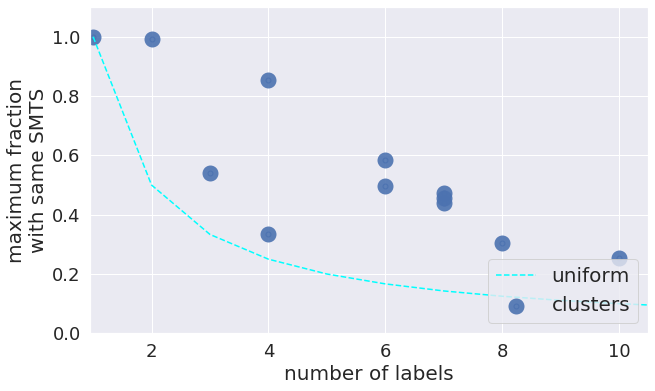

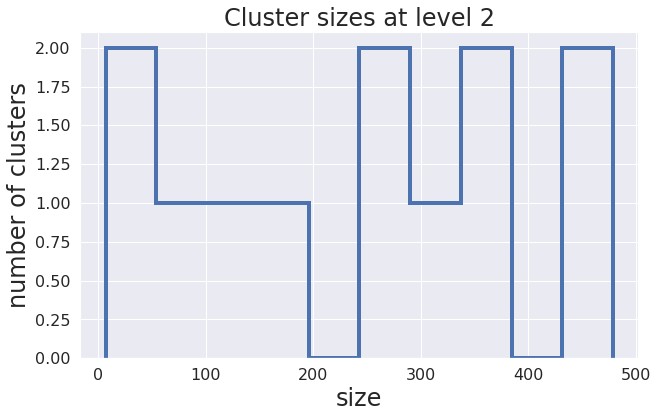

must shuffle files
False SMTS 1


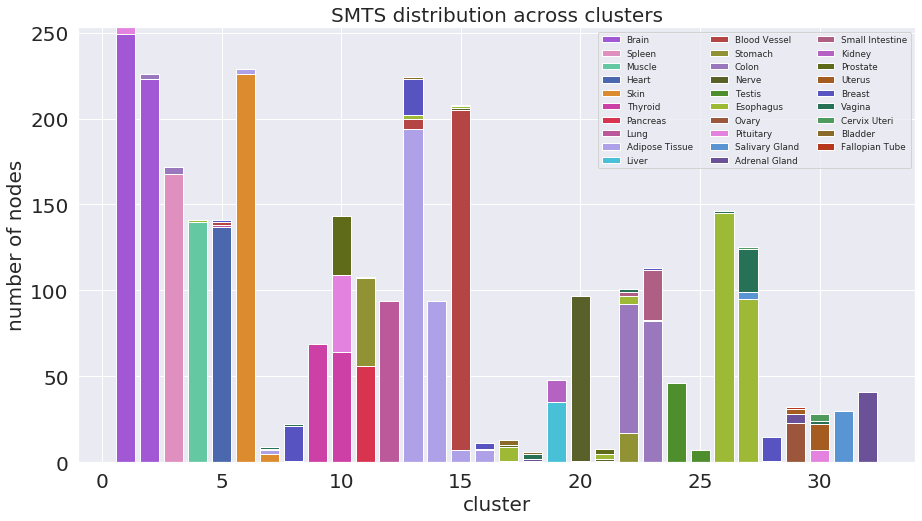

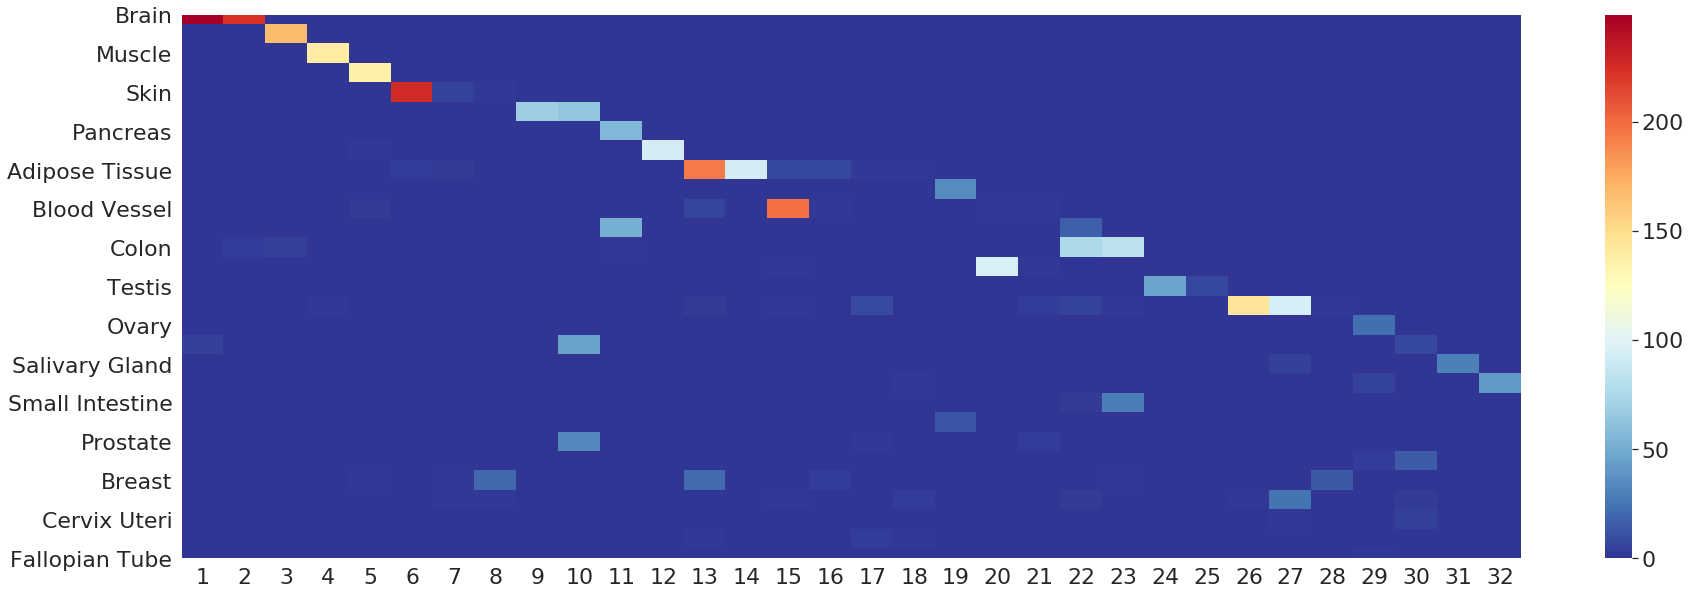

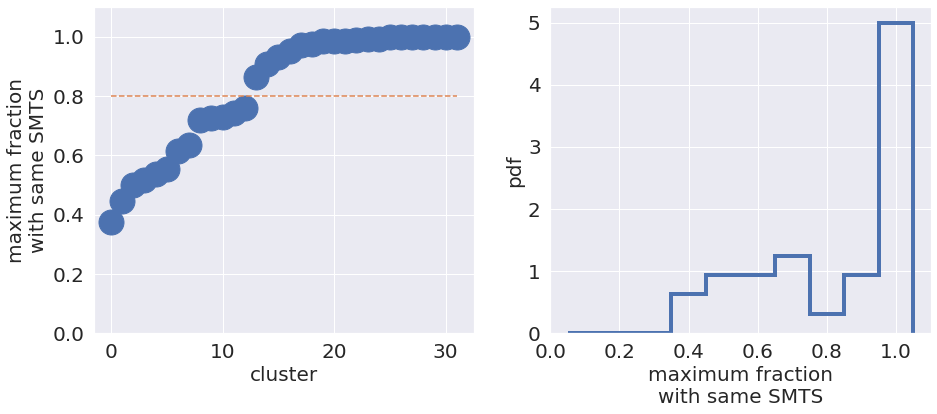

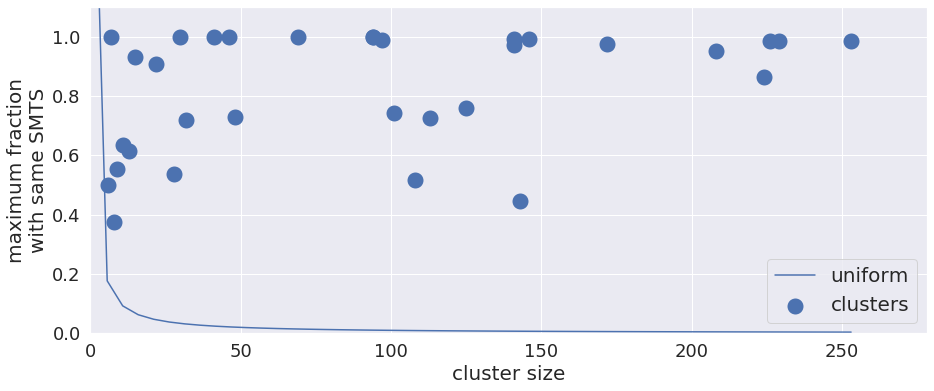

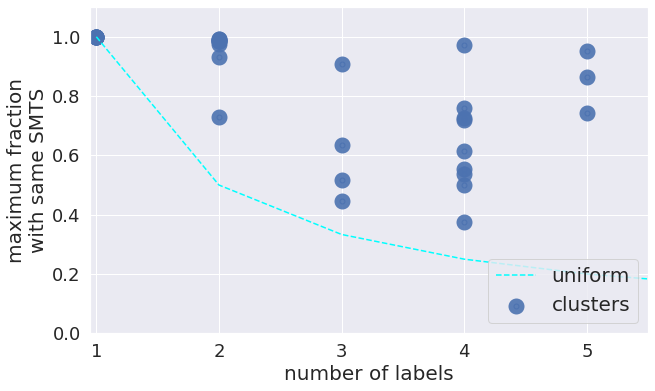

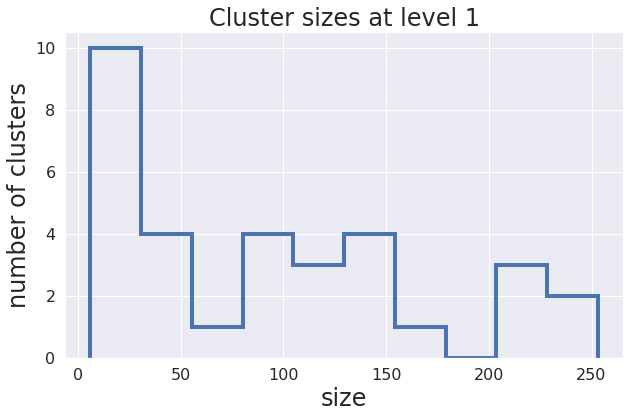

must shuffle files
False SMTS 0


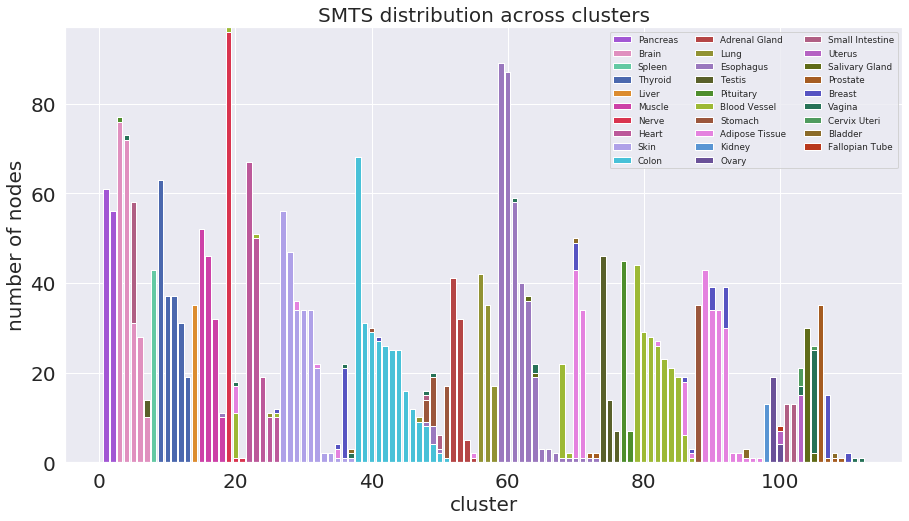

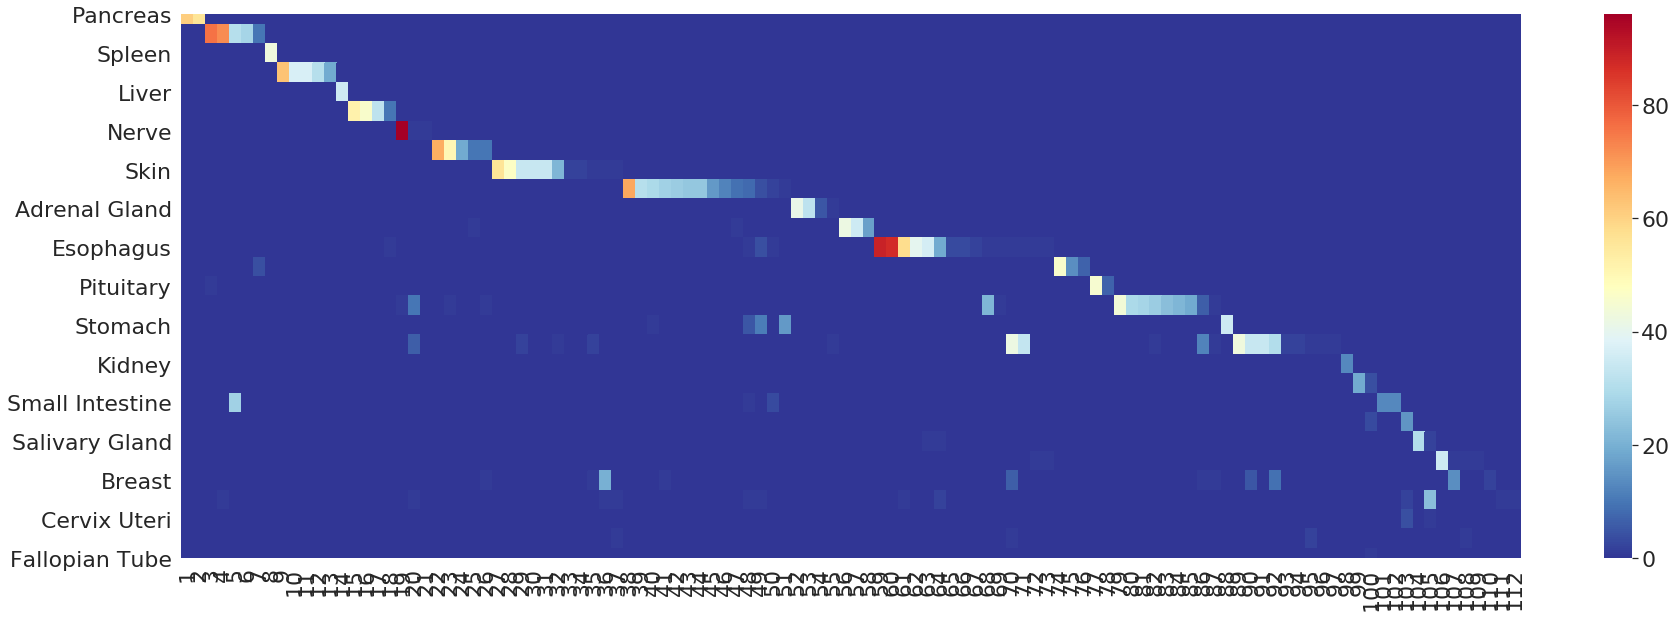

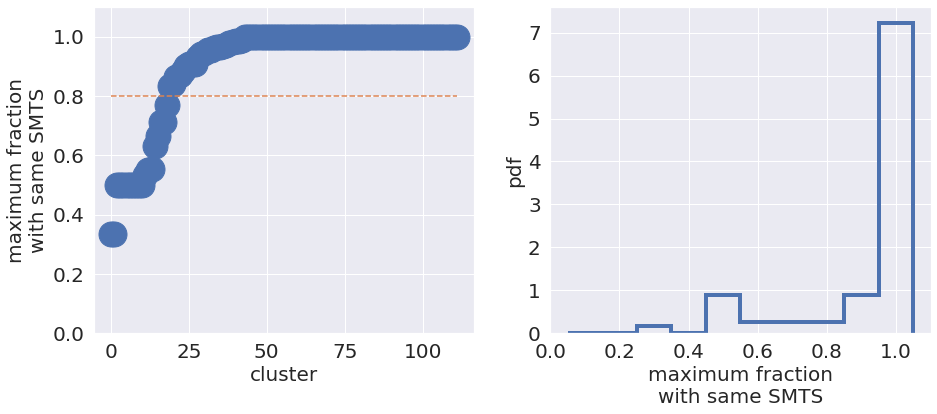

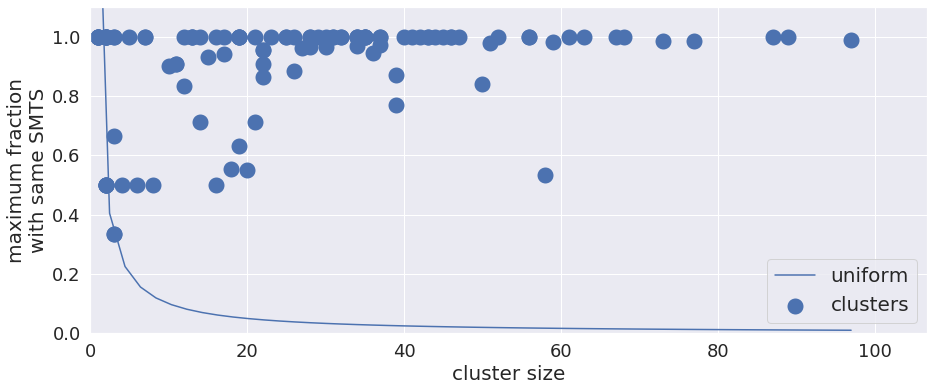

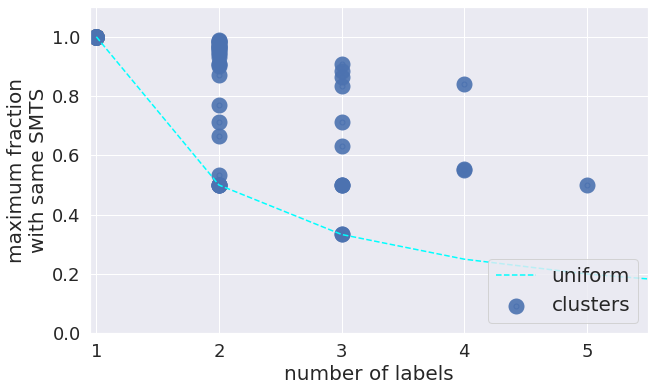

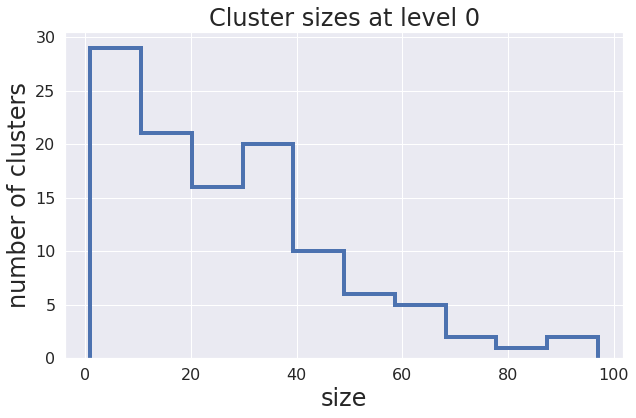

must shuffle files


In [32]:
for normalise in [True, False]:
    for label in labels:
        for level in np.arange(L+1)[::-1]:
            if level==0:
                pass
                #continue
            print(normalise, label, level)
            try:
                cluster = get_cluster_given_l(level, directory,algorithm=algorithm)
                fraction_sites = get_fraction_sites(cluster,df_files=df_files,label=label, normalise=normalise)

                #fsdf = pd.DataFrame(data=fraction_sites)
                #fsdf = fsdf.drop('Other', axis=1)
                #fsdf = fsdf.divide(fsdf.sum(axis=1), axis=0).fillna(0)
                #fraction_sites = fsdf.sort_values(by=fsdf.columns.to_list(), ascending=True).to_dict(orient='list')

                clustersinfo = get_clustersinfo(cluster,fraction_sites)
                plot_cluster_composition(fraction_sites,directory,level,label=label, normalise=normalise,algorithm=algorithm)
                make_heatmap(fraction_sites, directory, label, level, normalise=normalise,algorithm=algorithm)

                clustersinfo = get_clustersinfo(cluster,fraction_sites)            
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level, directory,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_sizes(level,directory, algorithm=algorithm)
            except:
                print(*sys.exc_info())
            try:
                fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("%s/files_shuffles.dat"%directory, index_col=[0]),label=label, normalise=normalise)
                clustersinfo_shuffle = get_clustersinfo(cluster, fraction_sites_shuffle)
                plot_cluster_composition(fraction_sites_shuffle,directory,level, label=label, shuffled=True, normalise=normalise)
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level,directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_labels_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
            except:
                print("must shuffle files")

In [ ]:
##useful for R clustree plot
def reindex(x):
    i=1
    last=x[0]
    new = []
    for xi in x:
        if xi == last:
            pass
        else:
            i+=1
            last=xi
        new.append(i)
    return new

df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_labels = pd.DataFrame()
shape = df_clusters.dropna().shape
files = df_clusters.dropna().values.reshape(shape[0]*shape[1],)
for level in np.arange(L+1)[:0:-1]:
    print(level)
    df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,level), header=[0])
    currentlevellabels = []
    for file in files:
        s = df_clusters[df_clusters.isin([file])].any(0)
        a = s.index[s]
        currentlevellabels.append(int(a[0][8:])-1)
    df_labels.insert(0,'l%d'%level,currentlevellabels)
    del currentlevellabels
filelabels = []
filesublabels = []
for file in files:
    try:
        filelabels.append(get_file(file, df_files)[labels[0]])
        filesublabels.append(get_file(file, df_files)[labels[1]])
    except:
        filelabels.append('unknown')
        filesublabels.append('unknown')
        print(*sys.exc_info())
df_labels.insert(0,'tissue', filelabels)
df_labels.insert(0,'subtissue', filesublabels)
df_labels.sort_values(by=['tissue','subtissue'], inplace=True)
df_labels.sort_values(by=["l%d"%l for l in np.arange(L+1)[:0:-1]], axis=0, inplace=True)
filelabels = df_labels['tissue']
filesublabels = df_labels['subtissue']
df_labels = df_labels.apply(reindex, axis=0)
df_labels['tissue']=filelabels
df_labels['subtissue']=filesublabels
df_labels.to_csv("%s/%s/topsbm_labels.csv"%(directory,algorithm), index=False, header=True)

In [33]:
if "clustersizes.txt" in os.listdir(directory):
    with open("%s/clustersizes.txt"%directory, 'r') as f:
        xl=np.array(f.read().split()).astype(int)
else:
    try:
        xl = getclustersizesarray(directory, L)
        with open("%s/clustersizes.txt" % directory, 'w') as f:
            for x in xl:
                f.write("%d\n" % x)
    except:
        print(*sys.exc_info())
        print("cannot save clustersizes.txt")

if "topicsizes.txt" in os.listdir(directory):
    with open("%s/topicsizes.txt"%directory) as f:
        tl=np.array(f.read().split()).astype(int)
else:
    try:
        tl = gettopicsizesarray(directory, L)
        with open("%s/topicsizes.txt" % directory, 'w') as f:
            for x in tl:
                f.write("%d\n" % x)
    except:
        print("cannot save topicsizes.txt")

/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/ipykernel_launcher.py:19: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250

In [43]:
scores = get_scores(directory, labels, df_files=df_files, verbose=False)
scores['hsbm'] = scores['SMTS']

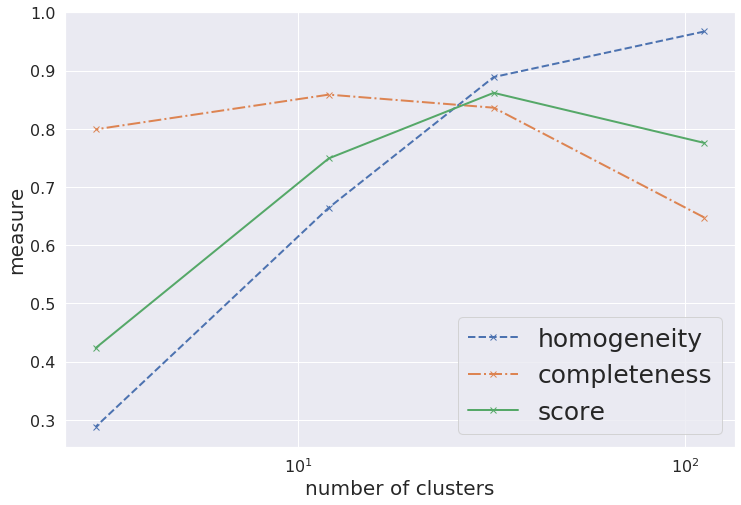

In [44]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
#add_score_lines(ax,scores,[labels[0]],xl, h=True, c=True, alpha=1)
h = np.array(scores['hsbm']['h'])
c = np.array(scores['hsbm']['c'])
ax.plot(scores['hsbm']['xl'],h, marker='x', ls='--', lw=2, label='homogeneity')
ax.plot(scores['hsbm']['xl'],c, marker='x', ls='-.', lw=2,label='completeness')
ax.plot(scores['hsbm']['xl'],scores['hsbm']['V'], marker='x', ls='-', lw=2, label='score')
ax.set_xscale('log')
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=25)
plt.xlabel('number of clusters', fontsize=20)
plt.ylabel('measure', fontsize=20)
plt.show()
fig.savefig("%s/metric_scores_primarysite.pdf"%(directory))

In [46]:
scores = {}
scores['hsbm'] = get_scores(directory, labels, df_files=df_files, verbose=False)['SMTS']
scores['hierarchical'] = get_scores(directory, labels, df_files=df_files, algorithm='hierarchical', verbose=False)['SMTS']
scores['lda'] = get_scores(directory, labels, df_files=df_files, algorithm='lda', verbose=False)['SMTS']
#scores['kmeans'] = get_scores(directory, labels, algorithm='kmeans', verbose=False)['SMTS']
#scores['tm']=get_scores(directory, labels, algorithm='tm', verbose=False)['primary_site']
#scores['cc']=get_scores(directory, labels, algorithm='cc', verbose=False)['primary_site']
#scores['shuffle'] = get_scores_shuffled(directory, df_files,label='primary_site', algorithm='lda')
#scores['wgcna']=get_scores(directory, labels, algorithm='wgcna', verbose=False)['primary_site']

In [ ]:
scores['hierarchical'] = get_scores(directory, labels, algorithm='hierarchical', verbose=False)['primary_site']
scores['hierarchicaleuclidean'] = get_scores(directory, labels, algorithm='hierarchicaleuclidean', verbose=False)['primary_site']
scores['lda'] = get_scores(directory, labels, algorithm='lda', verbose=False)['primary_site']
#scores['hsbm->hierachical'] = pd.read_csv("%s/hierhsbm.scores"%directory).to_dict(orient='list')
scores['hsbm'] =  get_scores(directory, labels, algorithm='topsbm', verbose=False)['primary_site']
scores['tm']=get_scores(directory, labels, algorithm='tm', verbose=False)['primary_site']
scores['wgcna']=get_scores(directory, labels, algorithm='wgcna', verbose=False)['primary_site']
scores['cc']=get_scores(directory, labels, algorithm='cc', verbose=False)['primary_site']
scores['shuffle'] = get_scores_shuffled(directory, df_files,label='primary_site', algorithm='topsbm')

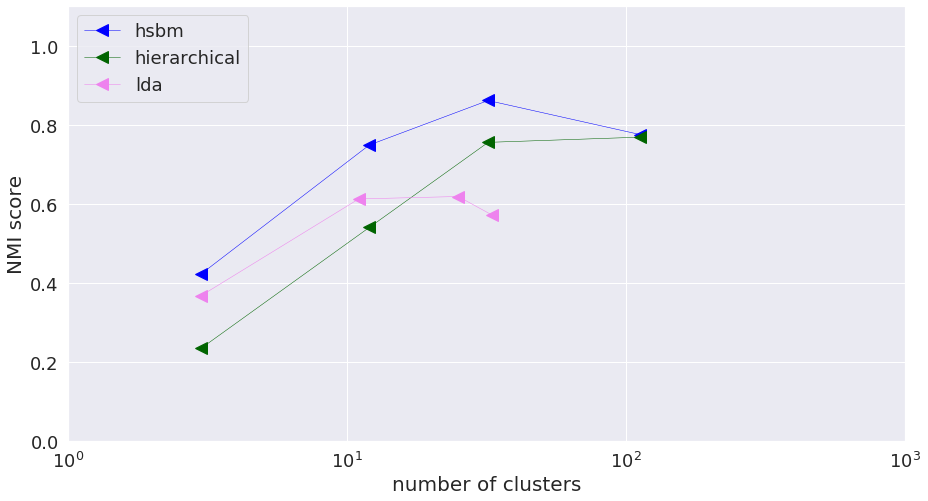

In [47]:
fig=plt.figure(figsize=(15,8))
ax = fig.subplots(1)
#add_score_lines(ax,scores,labels=['hsbm', 'hierarchical', 'lda', 'tm', 'cc', 'wgcna', 'shuffle'])
add_score_lines(ax,scores,labels=['hsbm', 'hierarchical', 'lda'])
plt.tick_params(labelsize=18)
#ax.set_xscale('linear')
plt.xlim(1,1000)
plt.legend(ncol=1, fontsize=18,loc='upper left' )
plt.show()
fig.savefig("%s/metric_scores_all.pdf"%(directory))

In [ ]:
scores

In [ ]:
X = pd.read_csv("%s/mainTable.csv"%directory, delimiter=',', index_col=0).transpose()

In [ ]:
X = X.parallel_apply(lambda x: x/np.sum(x).astype(float), axis=1)

In [ ]:
def update_keys(scores_container):
    if 'topsbm' in scores_container.keys():
        scores_container['hsbm']=scores_container['topsbm']
        scores_container.pop('topsbm')
    if 'hiersbm' in scores_container.keys():
        scores_container['hierhsbm']=scores_container['hsbm->hierachical']
        scores_container.pop('hierhsbm')

In [ ]:
x=np.array([1,2,0])
y=np.array([0,2,0])
np.log(np.true_divide(y,x, where=x!=0))

In [ ]:
from scipy.stats import entropy
def kl(x,y):
    xoy = np.true_divide(x,y, where=y!=0)
    yox = np.true_divide(y,x,where=x!=0)
    return (np.dot(x,np.log(xoy, where=xoy>0))+np.dot(y,np.log(yox, where=yox>0)))/2.

In [ ]:
silhouettes = {}
algorithms = ['topsbm', 'lda', 'hierarchical']
algorithms = ['hierarchical']
selected_metrics = np.concatenate(([*metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS.keys()],['correlation']))
for algorithm in algorithms:
    for metric in [kl]:
        key = algorithm+'_'+'kl'
        print(key)
        silhouettes[key]={}
        silhouettes[key]['data']=[]
        silhouettes[key]['labels']=[]
        silhouettes[key]['samples']=[]
        for level in np.arange(L+1):
            try:
                cluster = get_cluster_given_l(level, directory, algorithm=algorithm)
            except:
                print(sys.exc_info()[1])
                continue
            predicted_labels = []
            for c in cluster:
                for sample in cluster[c]:
                    try:
                        predicted_labels.append([get_file(sample,df_files).name,c])
                    except:
                        print(sys.exc_info()[0])
                        print("error searching %s in %s" % (label,sample))
            predicted_labels=np.array(predicted_labels)
            predicted_labels=pd.DataFrame(data=predicted_labels, columns=[0,'label']).set_index(0).sort_index()
            labs =predicted_labels['label'].ravel().astype(int)
            X_values = X[X.index.isin(predicted_labels.index)].sort_index().values
            try:
                silhouettes[key]['data'].append((metrics.silhouette_score(X_values, labs, metric=metric)))
                silhouettes[key]['samples'].append(metrics.silhouette_samples(X_values, labs, metric=metric))
                silhouettes[key]['labels'].append(labs)
            except:
                print(sys.exc_info()[1])
                silhouettes[key]['data'].append(np.nan)
                silhouettes[key]['samples'].append(np.nan)
                silhouettes[key]['labels'].append(np.nan)
update_keys(silhouettes)

In [ ]:
fig=plt.figure(figsize=(12,8))
for k in ["%s_euclidean"%a for a in algorithms]:
    plt.plot(xl,np.array(silhouettes[k]['data']), lw=2, ms=14, marker='x', label=k)
plt.ylabel("Silhouette", fontsize=20)
plt.xlabel("Number of clusters", fontsize=20)
plt.title("Silhouette score [correlation]", fontsize=20)
plt.ylim((-1.1,1.1))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.legend(loc='best', fontsize=20)
plt.show()
fig.savefig("%s/silhouette.pdf"%directory)

In [ ]:
for k in silhouettes.keys():
    # Aggregate the silhouette scores for samples belonging to
    sample_silhouette_values = silhouettes[k]['samples'][2]
    cluster_labels = silhouettes[k]['labels'][2]
    silhouette_avg = silhouettes[k]['data'][2]

    n_clusters=np.max(cluster_labels)+1#labels have 0
    if n_clusters!=n_clusters:
        continue
    y_lower = 10

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(k, fontsize=20)
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.7, 0.5*y_lower, "%d clusters"%n_clusters, fontsize=20)
    ax.text(-0.7, 0.3*y_lower, "%s metric"%k, fontsize=20)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", lw=2)
    plt.tick_params(labelsize=20)
    plt.show()
    fig.savefig("%s/silhouette_%s.pdf"%(directory,k))

In [ ]:
silhouettes.keys()

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [ ]:
true_labels = []
predicted_labels = []
for c in cluster:
    print(c)
    for sample in cluster[c]:
        #true_labels.append(getFile(sample)['primary_site'].values[0])
        try:
            true_labels.append(df_files.loc[sample][label])
            predicted_labels.append(c)
        except:
            print("error in %s"%sample)

In [ ]:
_, labels_true = np.unique(true_labels,return_inverse=True)

In [ ]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)

In [ ]:
series_metrics

In [ ]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [ ]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    raise

In [ ]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI','Homogeneity'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [ ]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

In [ ]:
df_files[df_files['primary_site']=='Brain']